In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_raw=pd.read_csv('CarPrice_Assignment.csv')
df=df_raw.copy()

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
Y=df[['price']]
df=df.drop(['price'],axis=1)

#### Encoding categorical features

In [ ]:

df_encoded = pd.get_dummies(
    df,
    columns=['CarName','fueltype','aspiration','doornumber','carbody','drivewheel'
                     ,'enginelocation','enginetype','cylindernumber','fuelsystem'],
    drop_first=True
)

X = df_encoded.drop(['car_ID'],axis=1)

In [ ]:
X.shape

(205, 189)

In [ ]:
Y.shape

(205, 1)

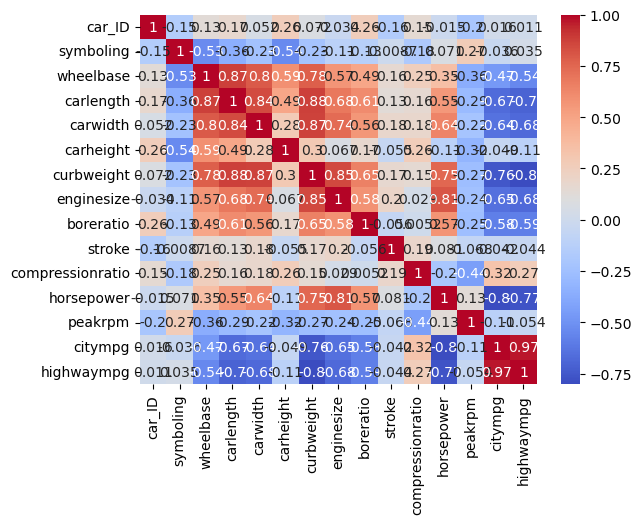

<Figure size 800x1400 with 0 Axes>

In [ ]:
num_df = df_encoded.select_dtypes(include=np.number)
corr_matrix = num_df.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.figure(figsize=(8,14))
plt.show()

#### Removing highly correlated features to avoid multicolinearity

In [ ]:
threshold = 0.85
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)
to_drop = [
    column
    for column in upper_triangle.columns
    if any(upper_triangle[column].abs() > threshold)
]
X_selected = X.drop(columns=to_drop)
X=X_selected

#### Splitting training and testing data

In [ ]:
X_train=X.iloc[:150,:]
Y_train=Y.iloc[:150,:]
X_test=X.iloc[150:,:]
Y_test=Y.iloc[150:,:]

#### Initialiazing weights and bias

In [ ]:
weights=np.zeros((X_train.shape[1],1))
bias=0

#### Normalization

In [ ]:
#normalization 
def normalization(train, test):
    train = train.copy()
    test = test.copy()

    num_cols = [
        col for col in train.columns
        if train[col].dtype != 'object' and train[col].nunique() > 2
    ]

    mean = train[num_cols].mean()
    std  = train[num_cols].std()

    train[num_cols] = (train[num_cols] - mean) / std
    test[num_cols]  = (test[num_cols]  - mean) / std

    return train, test


#### Prediction

In [ ]:
# prediction
def predict(features, weights,bias):
    return np.dot(features, weights)+bias

#### Cost Function

In [ ]:
def cost_function(features, targets, weights, bias):  #features-X & targets-Y
    prediction=predict(features,weights,bias)
    errors=targets-prediction
    cost=np.sum((errors)**2)/(2*len(features))
    return cost

#### Gradient Descent

In [ ]:
def gradient_descent(features, targets, weights, bias, learning_rate):
    m=len(features)
    prediction=predict(features, weights, bias)
    
    dw = np.dot(features.T, prediction-targets)/m
    db = np.sum(prediction-targets)/m
    
    weights=weights-learning_rate*dw
    bias=bias-learning_rate*db
    
    return weights, bias

#### Model

In [ ]:
def model(features, targets, weights, bias, learning_rate, num_iters):
    cost_history=[]
    for i in range(num_iters):
        weights, bias=gradient_descent(features, targets, weights, bias, learning_rate)
        cost=cost_function(features, targets, weights, bias)
        cost_history.append(cost)
    return weights, bias, cost_history

In [ ]:
X_train, X_test=normalization(X_train,X_test)

#### Converting the dataframes into numpy 

In [ ]:
X_train=X_train.to_numpy()
Y_train=Y_train.to_numpy()
X_test=X_test.to_numpy()
Y_test=Y_test.to_numpy()

In [ ]:
num_iters=30000
cost_history=[]
weights, bias, cost_history = model(X_train, Y_train, weights, bias, 0.1, num_iters)


Text(0.5, 1.0, 'Cost vs Iterations')

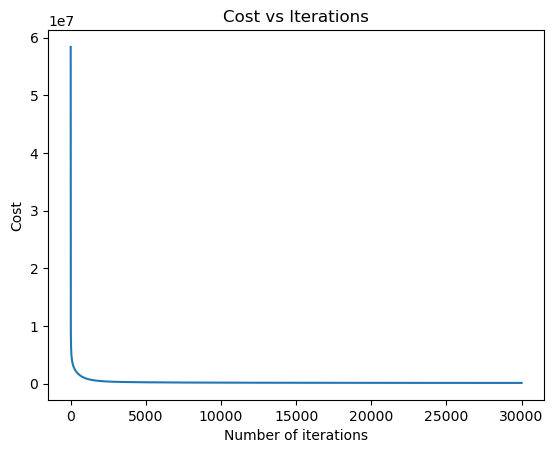

In [ ]:
plt.plot(range(num_iters),cost_history)
plt.ylabel('Cost')
plt.xlabel('Number of iterations')
plt.title('Cost vs Iterations')

In [ ]:
Y_pred=predict(X_test, weights, bias)

### Root Mean Squared Error (RMSE)

In [ ]:
rmse = np.sqrt(np.mean((Y_test - Y_pred) ** 2))
print("Root mean square error of the model: ", rmse)

Root mean square error of the model:  4558.3212612450625


In [ ]:
np.mean(Y_test)

11563.10909090909

## Since the mean of the car prices and the RMSE values are close which indicates high error. Linear Regression is not a suitable algorithm for this dataset

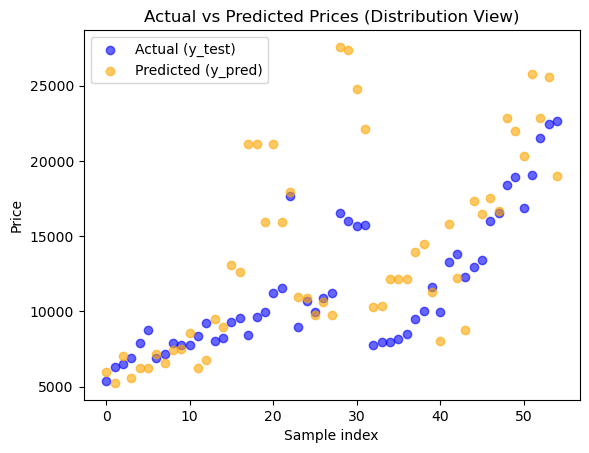

In [ ]:
plt.scatter(range(len(Y_test)), Y_test, color='blue', label='Actual (y_test)', alpha=0.6)
plt.scatter(range(len(Y_pred)), Y_pred, color='orange', label='Predicted (y_pred)', alpha=0.6)

plt.xlabel("Sample index")
plt.ylabel("Price")
plt.title("Actual vs Predicted Prices (Distribution View)")
plt.legend()
plt.show()


## The predictions are varrying highly and are clearly not aligning with the target values. A non linear model would suit such dataset

In [ ]:

def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)      
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)  
    r2 = 1 - (ss_res / ss_tot)
    return r2
r2 = r2_score(Y_test, Y_pred)
print("R² score:", r2)

R² score: -0.07631528561777023
